# Adidas US Sales Analysis

Welcome to my Adidas US Sales EDA. The Dataset I will be using will consist of Adidas sales data from the years 2020-2021. 

#### Aim

- This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.

- My aim is to explore this dataset to find out key sales trends, identifying successful products or marketing campaigns and developing possible strategies for future sales.

#### Actions

##### Preparation

- I will first import the dataset and look at all the fields in the dataset and look to clean the data provided i.e. finding all relevant fields that can be used for analysis, cleaning all missing values and duplicated rows to ensure our data is uniform and 

##### Analysing with Visuals

- Secondly, I will conduct univariate and bivariate analysis in the form of graphs using Seaborn and Matplotlib  in order to uncover the sales trends and analyse the products to answer our key questions. 

##### Conclusion

- I will provide a summary of the data findings and attempt to decipher any important points to help Adidas make decisions that might improve their business operations.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
adidas = pd.read_csv("data/Adidas US Sales Datasets.csv")

In [5]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,03/01/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,05/01/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [6]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [7]:
adidas["Invoice Date"]=pd.to_datetime(adidas["Invoice Date"], format='%d/%m/%Y')
adidas['Year']=pd.to_datetime(adidas['Invoice Date']).dt.year
adidas['Month']=pd.to_datetime(adidas['Invoice Date']).dt.month_name()
adidas['Day']=pd.to_datetime(adidas['Invoice Date']).dt.day_name()

In [8]:
cols_to_retype = ['Price per Unit','Units Sold','Total Sales','Operating Margin','Operating Profit']
for col in cols_to_retype:
    adidas[col] = adidas[col].str.replace("$", '').str.replace(",", '').str.replace("%", '').astype(float)

In [9]:
adidas.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Year
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,42.299129,2020.865050
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,2020.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,2021.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,2021.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,2021.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,2021.000000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.341688


##### 

Digging into the numbers, we found that the average price per unit hovered around $45. 

The average number of units sold per transaction stood at 256, contributing to an impressive average total sales figure of $93,273.



In [10]:
cols_to_string = ['Region','State','City','Product']
adidas[cols_to_string]=adidas[cols_to_string].astype('string')

In [11]:
adidas.drop(columns=['Retailer ID','Invoice Date'], inplace=True)

In [12]:
adidas.isna().sum()

Retailer            0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year                0
Month               0
Day                 0
dtype: int64

# Data Visualisation










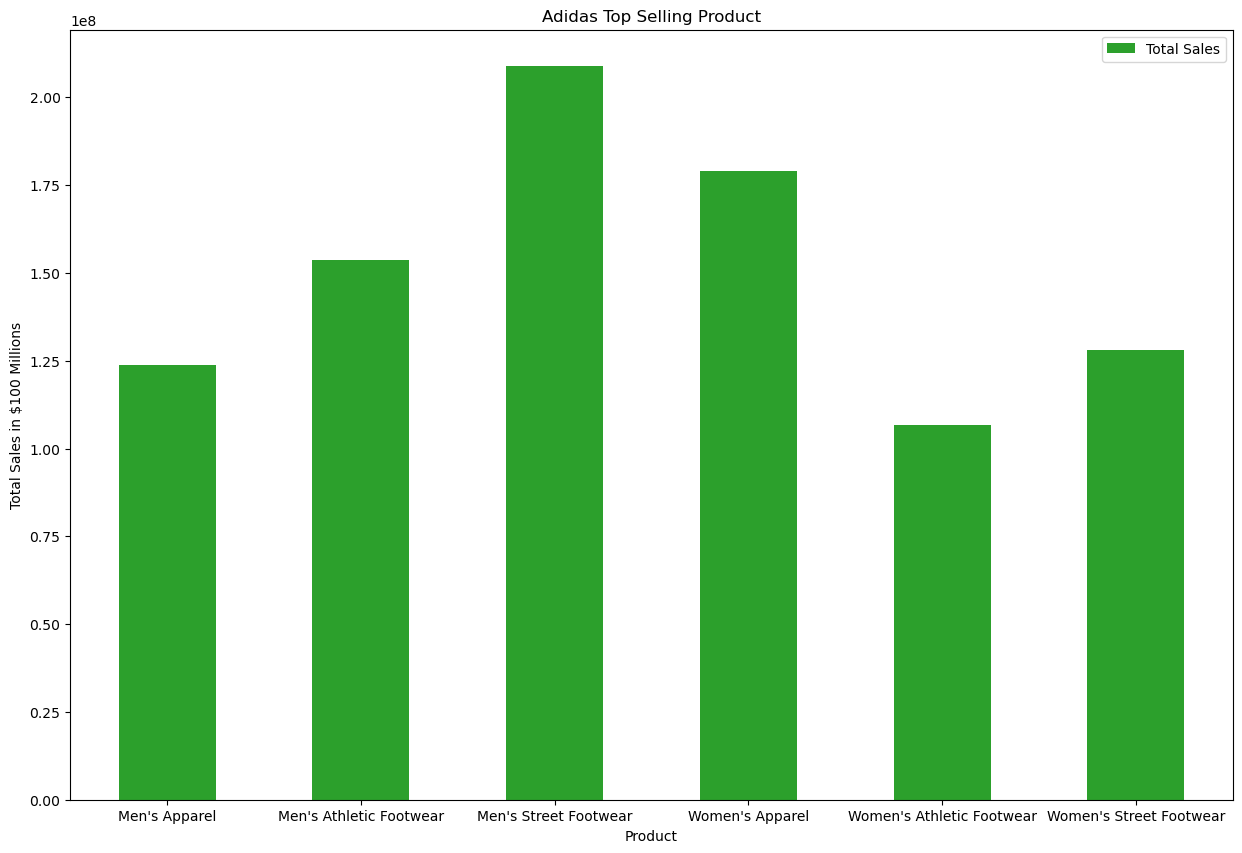

In [13]:
top_product = adidas[['Product', 'Total Sales']].groupby('Product').sum()

top_product.plot(kind='bar',
                 figsize=(15,10),
                 title='Adidas Top Selling Product',
                 color= '#2ca02c')
plt.xticks(rotation=0, ha="center")
plt.ylabel('Total Sales in $100 Millions')
plt.show()



#### Adidas' top-selling product in the US from 2020 to 2021 is Men's Street Footwear, followed by Women's Apparel. This suggests a gender preference in product choices, with men leaning towards footwear and women towards clothing. It could signify either a bias in product offerings or a potential mismatch in certain product categories within Men's Apparel and Women's Footwear. To gain a clearer understanding, specific item sales data would be essential.



               Total Sales
Retailer                  
Amazon          77698912.0
Foot Locker    220094720.0
Kohl's         102114753.0
Sports Direct  182470997.0
Walmart         74558410.0
West Gear      242964333.0


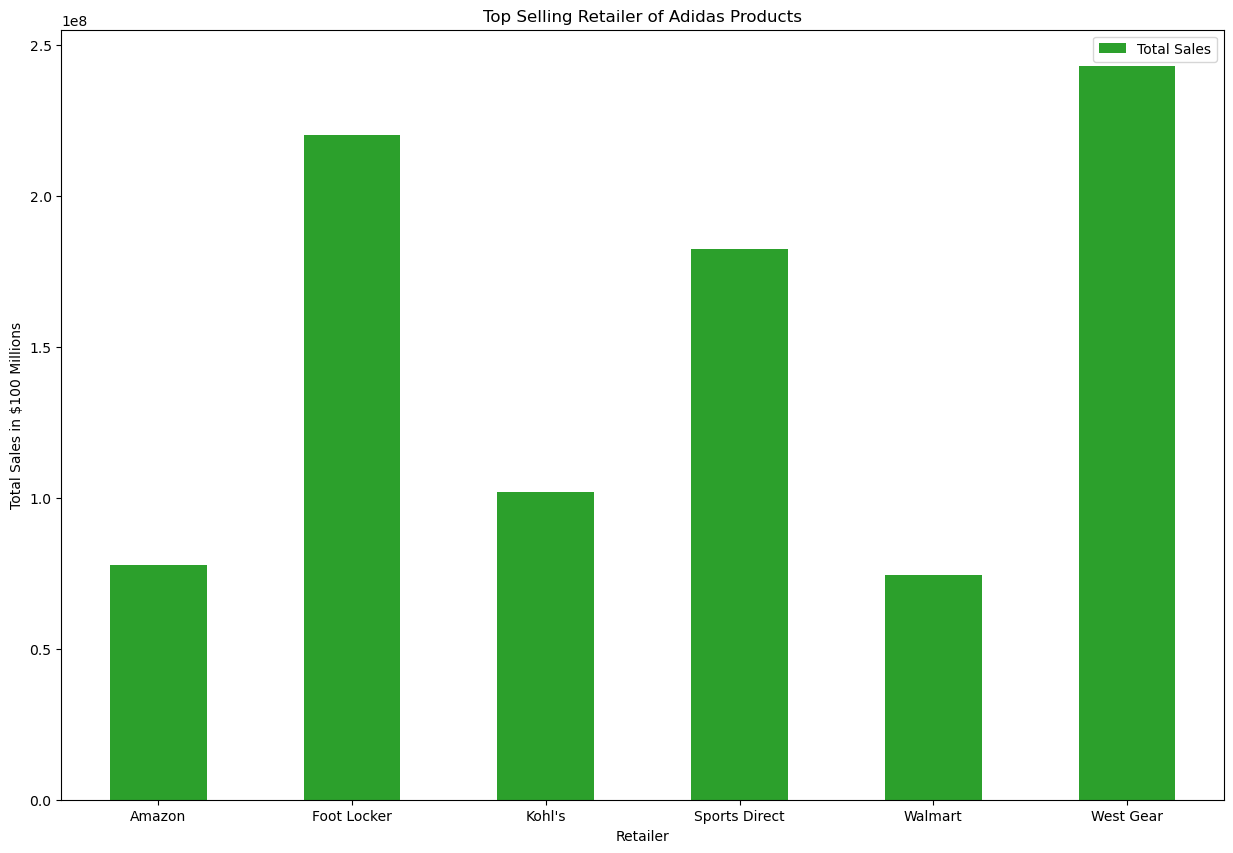

In [14]:
best_retailer = adidas[['Retailer', 'Total Sales']].groupby('Retailer').sum()
print(best_retailer)
best_retailer.plot(kind='bar',
                   figsize=(15,10),
                   title='Top Selling Retailer of Adidas Products',
                   color='#2ca02c')
plt.xticks(rotation=0, ha="center")
plt.ylabel('Total Sales in $100 Millions')
plt.show()


Retailer
Amazon           41.787144
Foot Locker      41.793326
Kohl's           41.929126
Sports Direct    44.489173
Walmart          40.653355
West Gear        41.785594
Name: Operating Margin, dtype: float64


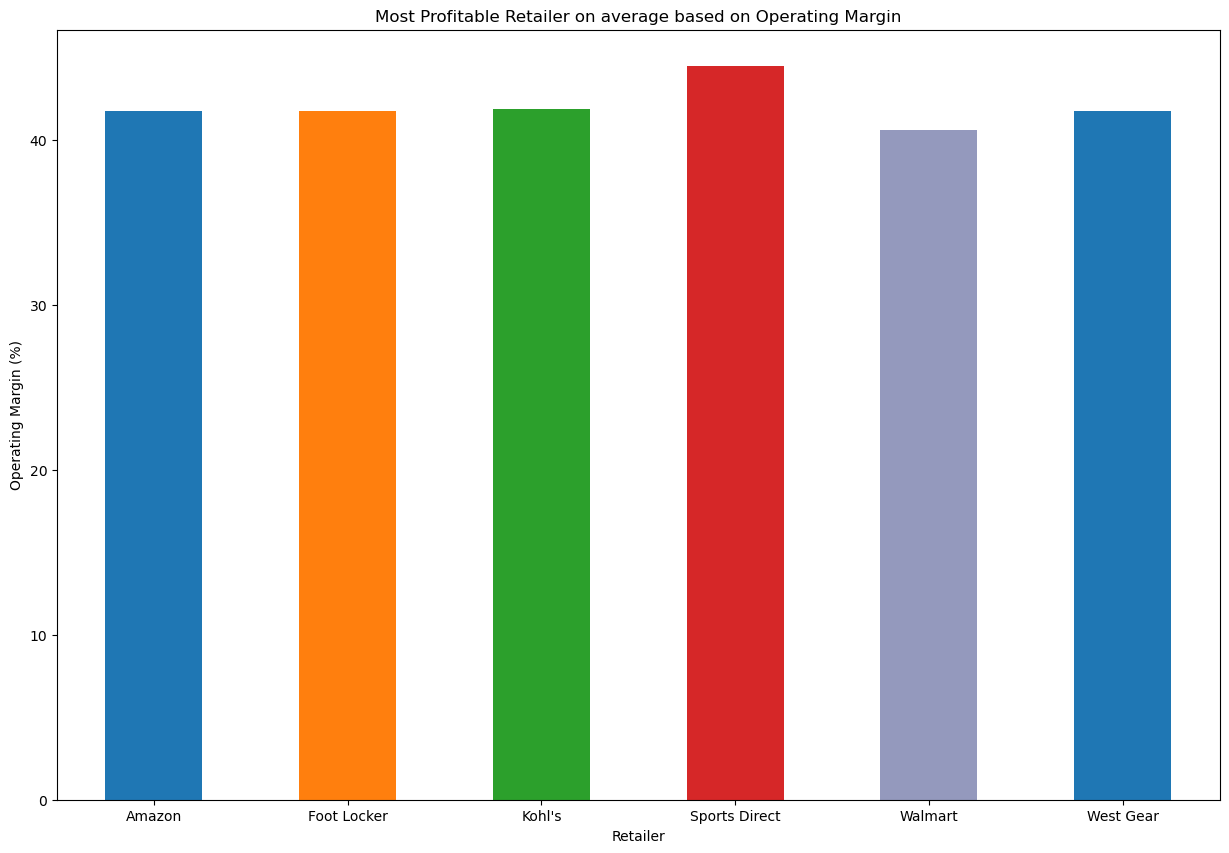

In [15]:
operating_Margin_retailer = adidas.groupby('Retailer')['Operating Margin'].mean()
print(operating_Margin_retailer)
operating_Margin_retailer.plot(kind='bar',
                       figsize=(15,10), 
                       title='Most Profitable Retailer on average based on Operating Margin',
                       color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9499bd'])
plt.xticks(rotation=0, ha="center")
plt.ylabel('Operating Margin (%)')
plt.show()

#### Examining total sales and operating margins of retailers selling Adidas products reveals interesting trends. Sporting goods-focused retailers like West Gear and Foot Locker outperform others, with total sales exceeding \\\$200 million. Notably, all retailers show operating margins above 40%, indicating the overall strong performance of Adidas products. Sports Direct leads with a 44% operating margin, possibly due to effective sales strategies.

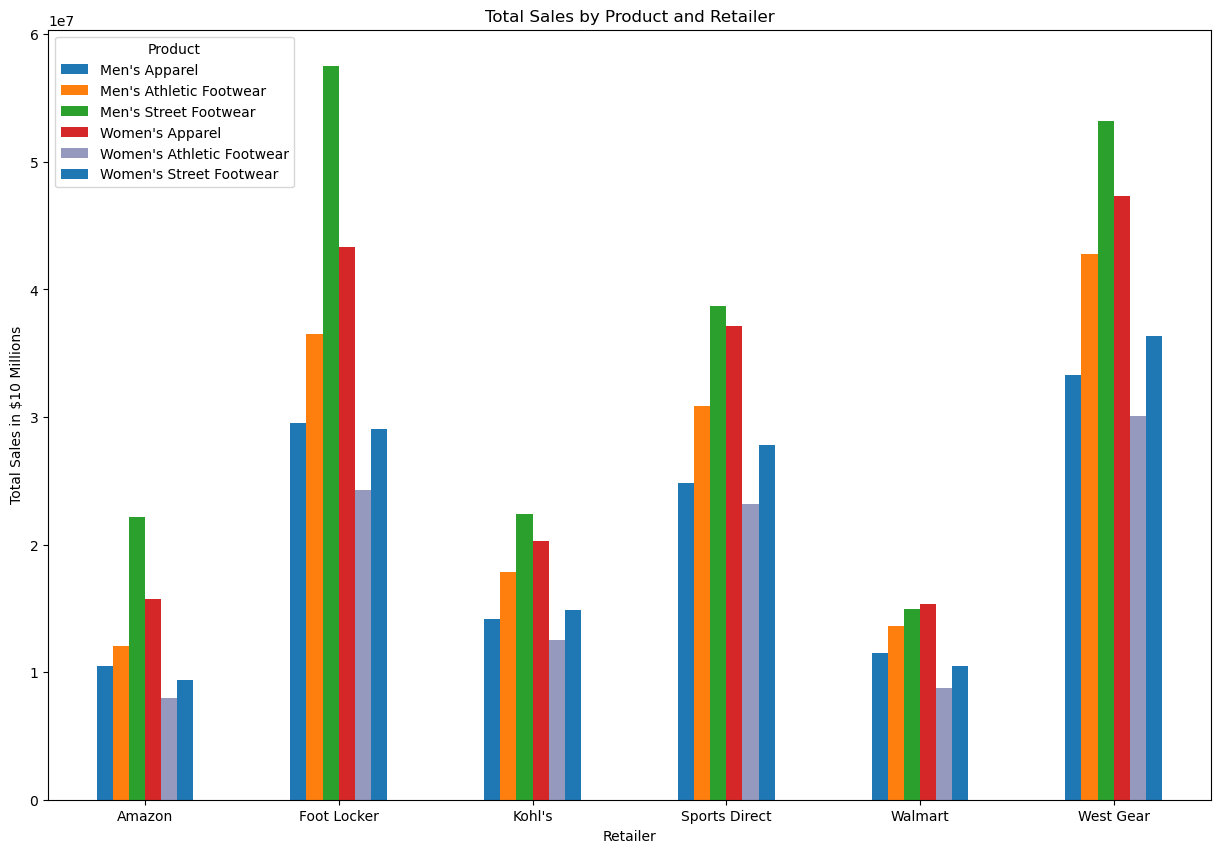

In [16]:
sales_prod_retail = adidas.groupby(['Retailer', 'Product'])['Total Sales'].sum().unstack(level=1)

sales_prod_retail.plot(kind='bar',
                       figsize=(15,10), 
                       title='Total Sales by Product and Retailer',
                       color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9499bd'])
plt.xticks(rotation=0, ha="center")
plt.ylabel('Total Sales in $10 Millions')
plt.show()

#### The Graph shows total sales of products by each retailer. Unsurprisingly, the sports specific stores show higher sales for all products compared to the multi department stores. However, there are some interesting details being shown such as walmart having similar sales for all products. Though we don't know exactly what  specific products are being sold, we can assume that the quality and price of the products are similar for all product categories, so they would have similar sales. The sport specific stores follow the same total sales structures as the product total sales graph.

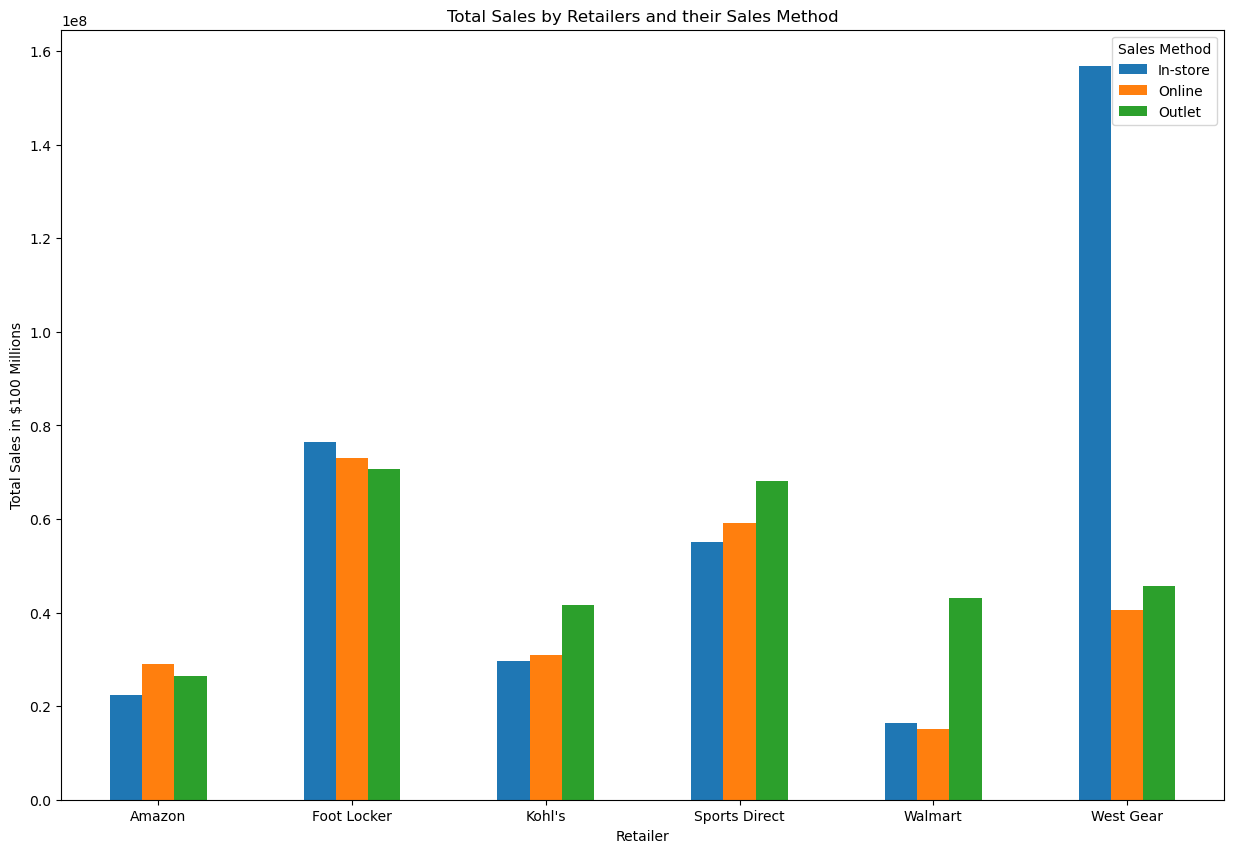

In [17]:
sales_Smeth_retail = adidas.groupby(['Retailer', 'Sales Method'])['Total Sales'].sum().unstack()
sales_Smeth_retail.plot(kind='bar',
                       figsize=(15,10), 
                       title='Total Sales by Retailers and their Sales Method',)
plt.xticks(rotation=0, ha="center")
plt.ylabel('Total Sales in $100 Millions')
plt.show()

#### West Gear seems to have an incredibly high amount of in store sales. The reason as to how they have achieved this is unknown but it could be due to a special promotion which could had led to the substantial amount of in store sales. However, this could also be an outcome due to an anomoly. We can also deduce from this graph that outlet sales are high for multi department store especially for Walmart. As Walmart is the largest Supermarket company in America, it must cater to all levels of income, therefore outleted prices are preferred for their customer base. I am surprised as I would assume that in an increasing online world we are becoming, it would be fair to assume that online sales would be much higher, especially as the years in the dataset align within the Covid pandemic timespan. This could tell us that brick and mortar stores are still important for customers, possibly due to being able to view and test the product before purchase.

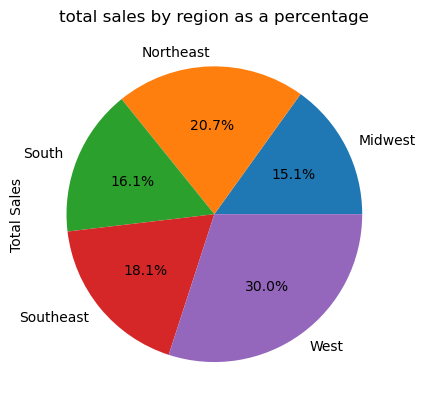

In [18]:
sales_region = adidas.groupby('Region')['Total Sales'].sum()
sales_region.plot(kind='pie',
                  title= 'total sales by region as a percentage',
                  autopct='%1.1f%%')
plt.show()

#### A pie graph illustrates regional sales distribution, with the West contributing 30% and the Northeast at 20%. This implies a preference for Adidas products in the Western region. Variances in sales between the regions could be attributed to lifestyle choices or pricing inconsistencies

In [19]:
top_grossing = adidas.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)


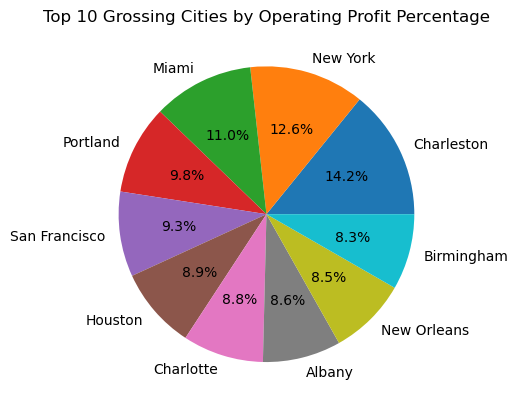

In [20]:
plt.pie(top_grossing['Operating Profit'],
        labels=top_grossing['City'],
        autopct='%1.1f%%')
plt.title('Top 10 Grossing Cities by Operating Profit Percentage')
plt.show()

#### Top grossing cities are Charleston and New York, comprising 14.2% and 12.6% of total sales, respectively. This contradicts the expectation that the majority of sales should come from the West. The absence of an Eastern region in the dataset raises questions about its completeness and potential inconsistencies.

####

In [21]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
adidas['Month'] = pd.Categorical(adidas['Month'], categories=months_order, ordered=True)

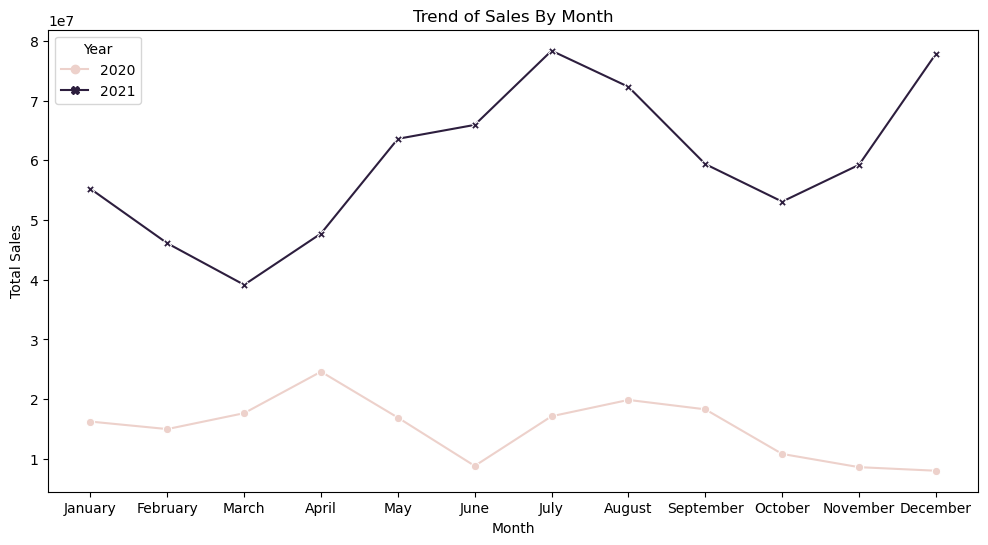

In [22]:
total_sales_month = adidas.groupby(['Year','Month'])['Total Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=total_sales_month,
    x="Month", 
    y="Total Sales", 
    hue="Year", 
    style="Year",
    markers=True, dashes=False)
plt.title("Trend of Sales By Month")
plt.show()



#### The time series analysis shows us an interesting takeaway with sales in 2021 following a seasonal uptrend. Months that fall within major holidays have the highest sales totals with August 2021 being both highest sales and most profitable month. Year 2020 somewhat follows an inverse trend which is suprising, however this could most likely be due to lockdown time during the Covid pandemic. The need for new clothing and shoes would not necessarily be prevelant as people were confined to their homes. If we use a more suitable sales trend timeline such as year 2021, Adidas could capitalise on releasing greater promotion and discounting on products to reach a wider customer base. Sales figures would most likely increase for all retailers. A different route could be to discount the months were the sales dip by running more promotions and releasing newer products when the sales tend to increase. 

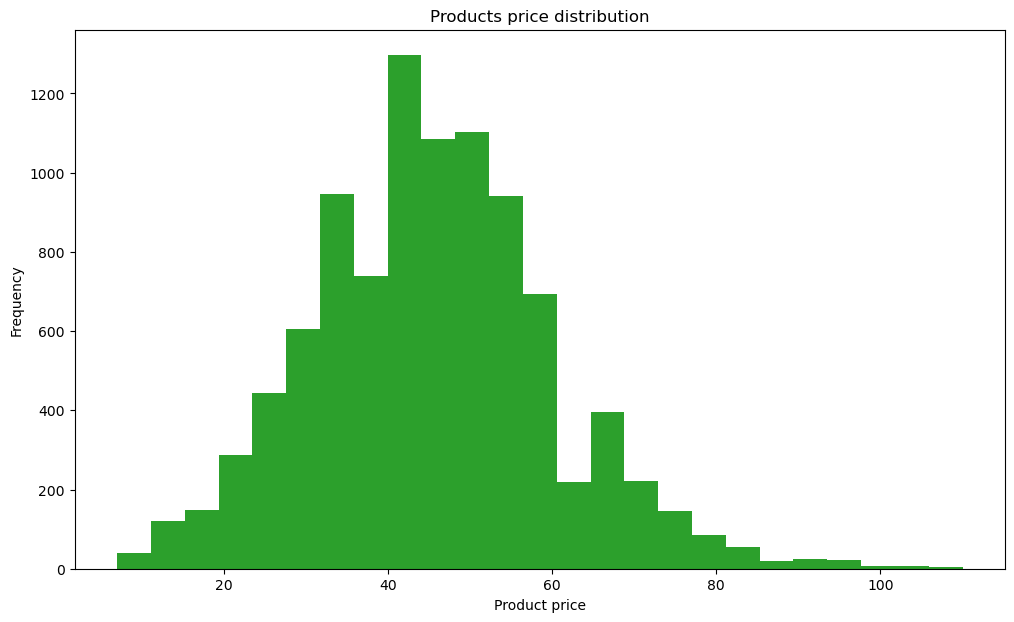

In [24]:
adidas['Price per Unit'].plot(kind='hist',
                          bins=25,
                          figsize=(12,7),
                          color='#2ca02c',     
                          title='Products price distribution',
                          xlabel= 'Product price'   )
plt.show()


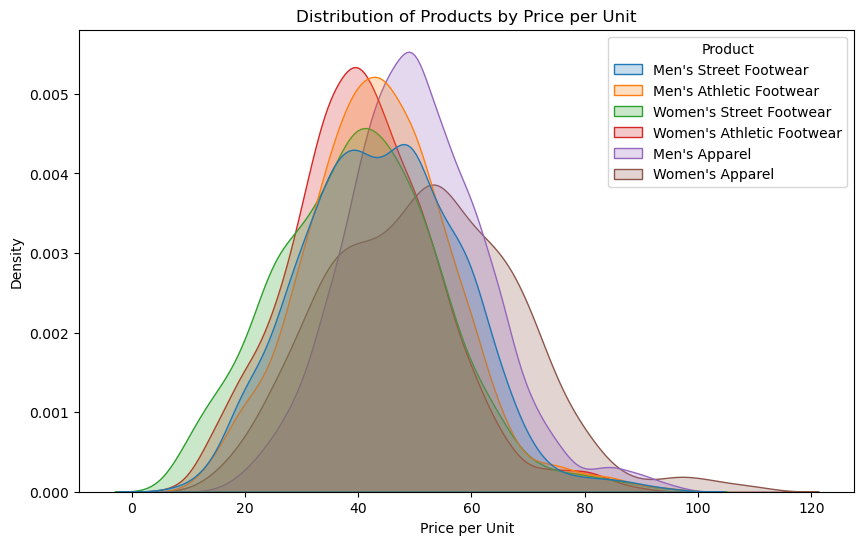

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=adidas, x='Price per Unit', hue='Product', fill=True)
plt.title('Distribution of Products by Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Density')
plt.show()

#### The KDE plot indicates that the majority of the product lines fall within 40 to 60 dollars. We have seen that for women, the most popular product line is apparel. The graphs shows that women's apparel has the largest range of pricing and the widest distribution curve suggesting that apparel pricing can vary alot more compared to the other product lines for women. This could be an indication as to why for women, apparel has the highest sales total as it could be alot more affordable than their footwear counterparts. 

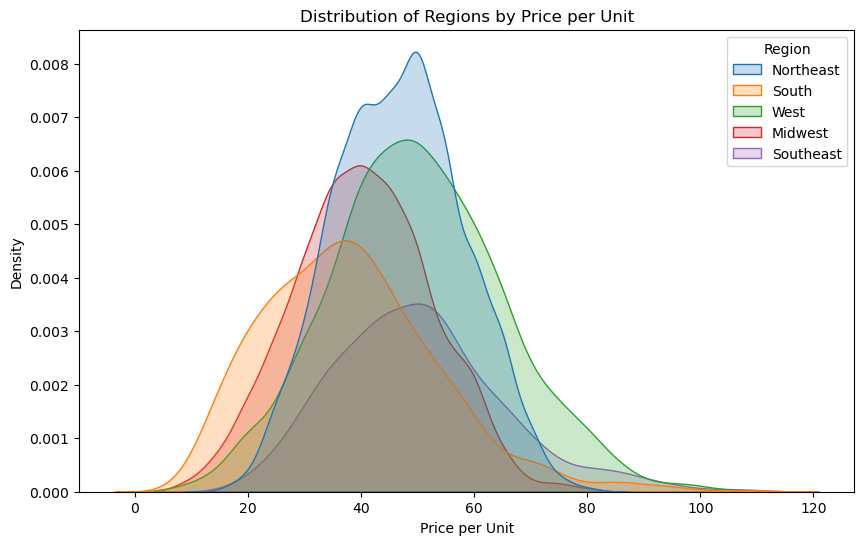

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=adidas, x='Price per Unit', hue='Region', fill=True)
plt.title('Distribution of Regions by Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Density')
plt.show()

#### The bulk of the products in the Northeastern area are priced between 56 and 58 dollars, with a concentrate on items in the 40 to 60 dollar range. The cost in the West and Southeast appears to be approximately fifty dollars, based on the peaks of the curves. On the other hand, the products in the Midwest and South are priced around forty dollars or less. There might be a number of reasons for this, including the need to cut costs in order to satisfy customers due to income differences between the south and other areas. Furthermore, compared to other areas, Adidas items might not be appropriate due to cultural or fashion differences. These are some of the variables that can be taken into account while deciding what to do when finding solutions to increase the sales in these areas or trying to meet the expectations for this demographic.

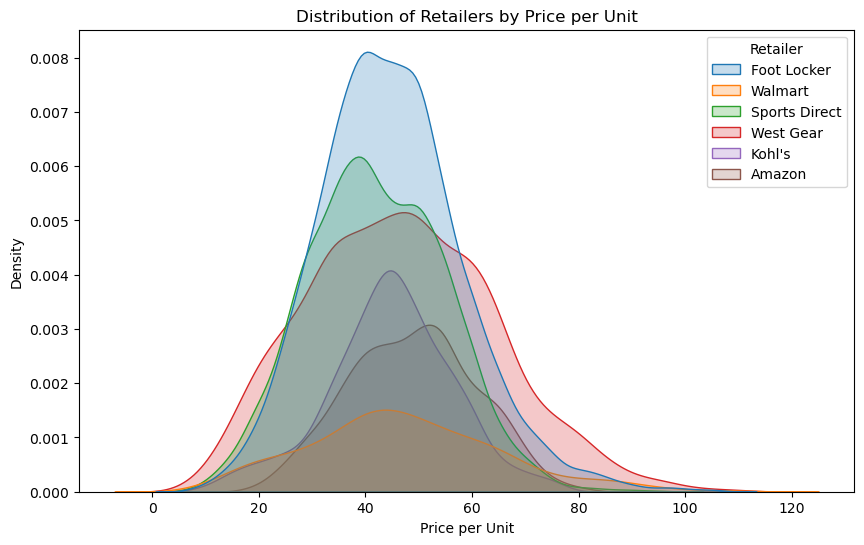

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=adidas, x='Price per Unit', hue='Retailer', fill=True)
plt.title('Distribution of Retailers by Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Density')
plt.show()

#### Retailer pricing analysis demonstrates that, except for Amazon, the average price per unit falls within the \\\$35 to $60 range. Amazon exhibits a flat bell curve, indicating a wider variance in pricing. Further data is needed to understand the rationale behind this variation.

In [28]:
adidas2 = adidas.copy()

In [29]:
adidas2['Region']=pd.factorize(adidas2.Region)[0]
adidas2['State']=pd.factorize(adidas2.State)[0]
adidas2['City']=pd.factorize(adidas2.City)[0]
adidas2['Product']=pd.factorize(adidas2.Product)[0]
adidas2['Retailer']=pd.factorize(adidas2.Retailer)[0]

In [30]:
adidas2.rename(columns = {'Sales Method':'Method'}, inplace = True)
adidas2['Method']=pd.factorize(adidas2.Method)[0]

In [31]:
adidas2.drop(columns=['Year', 'Month','Day'], inplace=True)

In [32]:
columns_to_convert = ['Units Sold', 'Total Sales', 'Operating Profit', 'Retailer', 'Region', 'State', 'City', 'Product', 'Method', ]

for column in columns_to_convert:
    adidas2[column] = adidas2[column].astype(int)

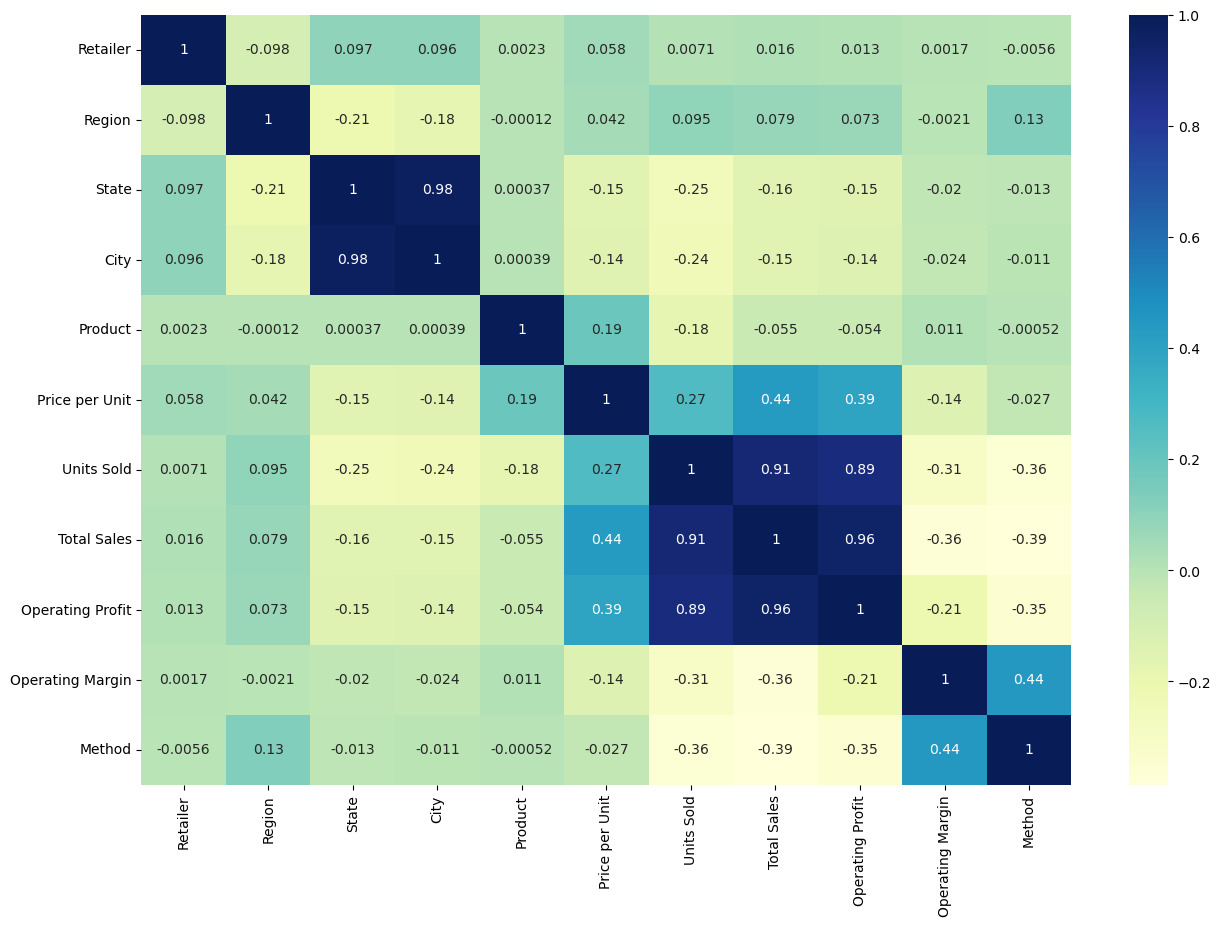

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(adidas2.corr(), cmap="YlGnBu", annot = True,)
plt.show()

#### The heatmap shows positive correlations among sales and profit variables, emphasizing their interconnectedness. Interestingly, region and city do not appear strongly correlated, challenging assumptions made from earlier graphs. The correlation between sales method and operating margin suggests that the method of sale influences the profit margin. Given the dataset's pandemic timeline, additional data post-2021 is required to confirm these observations.

# Conclusion

### The exploration of the Adidas US sales dataset provides valuable insights that can guide strategic decisions for future sales and audience expansion. Here are the key findings and their implications:

#### Product Preference by Gender:

- Men's Street Footwear emerges as the top-selling product, while Women's Apparel follows closely.
- The observed bias in product choices between genders highlights an opportunity for Adidas to explore potential gaps in meeting customer expectations, particularly within Men's Apparel and Women's Footwear.

#### Retailer Insights:
- Retailers specializing in sporting goods, like West Gear and Foot Locker, lead in total sales, showcasing a strong association between sports-focused stores and Adidas product performance.
- Operating margins for all retailers remain consistently above 40%, affirming the profitability and effectiveness of Adidas products in the market.

#### Sales by Region:
- The West Region dominates Adidas sales in the US, indicating regional preferences. Understanding lifestyle, fashion choices, and pricing dynamics could be crucial for tailoring strategies to different regions.
- Targeting regions with higher sales, like the West and Northeast, could be a key focus for marketing and distribution efforts.

#### City-specific Insights:
- Charleston and New York emerge as top-grossing cities, challenging the assumption that the West Region alone drives sales. Further data exploration and verification may be required to resolve potential dataset inconsistencies.

#### Seasonal Sales Trends:
- Seasonal uptrends in 2021, especially during major holidays, suggest a strategic opportunity for Adidas to capitalize on these periods with targeted promotions and discounts.
- The inverse trend observed in 2020 aligns with pandemic-related lockdowns, indicating a need for adaptive strategies in response to external factors.

#### Pricing Strategies:
- The majority of products fall within the $40 to $60 price range, with women's apparel exhibiting wider pricing variations.
- Tailoring pricing strategies based on gender and product categories, especially within the Northeast, West, and Southeast, could optimize sales.

#### Sales Method and Operating Margin:
- The observed influence of sales methods on operating margins highlights the need for ongoing analysis, particularly in the post-pandemic era, to adapt to evolving market dynamics.

### In summary, Adidas can enhance future sales and reach a wider audience by:

- Addressing potential gaps in meeting customer expectations, especially within Men's Apparel and Women's Footwear.
- Targeting regions with higher sales, tailoring marketing strategies to regional preferences.
- Capitalizing on seasonal trends with targeted promotions during peak sales periods.
- Fine-tuning pricing strategies based on gender, product categories, and regional variations.
- Monitoring and adapting sales methods to optimize operating margins.


